# Algorithme Non Supervisé

### Ajout des bibliothèques

In [19]:
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import umap



### Importation CSV file

We don't use the id et time_active column.

In [20]:
# Importation CSV file
df = pd.read_csv('data/users.csv')

# Suppression de 'user_id' et 'time_active'
X = df.drop(columns=['user_id', 'time_active'])

# Vérifie si c'est bon
print("Colonnes conservées :", X.columns.tolist())

Colonnes conservées : ['n_tweets', 'n_replies', 'n_quotes', 'n_retweets', 'max_followers', 'n_mentions', 'n_hashtags', 'n_urls', 'n_out_urls', 'f_tweets', 'f_friends']


### Standardisation des données

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### KMeans clustering

In [22]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)


### Evaluation du nombre de clusers 



In [30]:

# Sous-échantillonnage
from sklearn.utils import resample
X_sample = resample(X_scaled, n_samples=10000) if X_scaled.shape[0] > 2000 else X_scaled

# Test des k
for k in range(2, 13):
    km = KMeans(n_clusters=k, n_init=10)
    km.fit(X_sample)
    score = silhouette_score(X_sample, km.labels_)
    print(f"k={k}, silhouette={score:.3f}")


k=2, silhouette=0.991
k=3, silhouette=0.970
k=4, silhouette=0.936
k=5, silhouette=0.897
k=6, silhouette=0.890
k=7, silhouette=0.789
k=8, silhouette=0.781
k=9, silhouette=0.710
k=10, silhouette=0.615
k=11, silhouette=0.439
k=12, silhouette=0.619


Problem : a lot of k are good enough for a non supervised algorithm.

##  KMeans tests

## def of a function

In [24]:
def algoKmeans(k):
    # Liste des features utilisées pour la normalisation (à adapter selon ton code)
    features = ['n_tweets', 'n_replies', 'n_quotes', 'n_retweets', 'max_followers', 
                'n_mentions', 'n_hashtags', 'n_urls', 'n_out_urls', 'f_tweets', 'f_friends']
    
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X_scaled)
    clusters = kmeans.labels_
    centers = kmeans.cluster_centers_
    inertia = kmeans.inertia_
    
    print("🔹 Labels (attribution des clusters) :")
    print(clusters)

    print("\n🔹 Centres des clusters (coordonnées dans l’espace PCA ou des features) :")
    print(centers)

    print(f"\n🔹 Inertie (somme des distances intra-cluster) : {inertia:.2f}")

    # Réduction de dimension à 2 composantes principales
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    print("Variance expliquée par PC1 et PC2 :", pca.explained_variance_ratio_)
    print("Somme :", sum(pca.explained_variance_ratio_))
    
    # DataFrame pour visualisation PCA + clusters
    df_visu = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
    df_visu['cluster'] = clusters
    df_visu['user_id'] = df['user_id'].values  # si user_id est dans df
    
    # Ajout des clusters dans df original (non normalisé)
    df['cluster'] = clusters
    
    # Moyennes des variables originales par cluster
    features = df.columns.drop(['user_id', 'cluster'])  # adapte selon colonnes à exclure
    moyennes_orig = df.groupby('cluster')[features].mean()
    
    print("\n🔹 Moyennes des variables originales par cluster :")
    print(moyennes_orig)

    # Visualisation graphique PCA + clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_visu, x='PC1', y='PC2', hue='cluster', palette='Set1', s=60)

    plt.title(f"Représentation des clusters KMeans en 2D (ACP) pour k={k}")
    plt.xlabel("Composante principale 1")
    plt.ylabel("Composante principale 2")
    plt.legend(title="Cluster")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    
    #Visualisation avec UMAP (pas fonctionnel)
    
    # reducer = umap.UMAP(n_components=2, random_state=42)
    #X_umap = reducer.fit_transform(X_scaled)

    # sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=clusters, palette='Set2')
    # plt.title("UMAP des utilisateurs avec KMeans")
    # plt.show()

### Kmeans = 2

🔹 Labels (attribution des clusters) :
[0 0 0 ... 0 0 0]

🔹 Centres des clusters (coordonnées dans l’espace PCA ou des features) :
[[-7.33102888e-04 -6.99179843e-05 -1.11438189e-03 -5.85142807e-04
  -4.10194638e-06 -5.67441293e-04 -7.71957800e-04 -7.19559722e-04
  -1.92699599e-04  4.01534915e-12 -6.86990721e-05]
 [ 4.50476085e+02  4.29631097e+01  6.84763899e+02  3.59557772e+02
   2.52055854e+00  3.48680569e+02  4.74351600e+02  4.42154099e+02
   1.18409793e+02 -2.46792530e-06  4.22141142e+01]]

🔹 Inertie (somme des distances intra-cluster) : 16195257.32
Variance expliquée par PC1 et PC2 : [0.41317466 0.11275574]
Somme : 0.525930390696418

🔹 Moyennes des variables originales par cluster :
            n_tweets  n_replies     n_quotes   n_retweets  max_followers  \
cluster                                                                    
0           2.472259   0.054903     0.354993     1.621647    3602.476920   
1        4182.666667  57.666667  1674.333333  2611.666667  302461.333333   



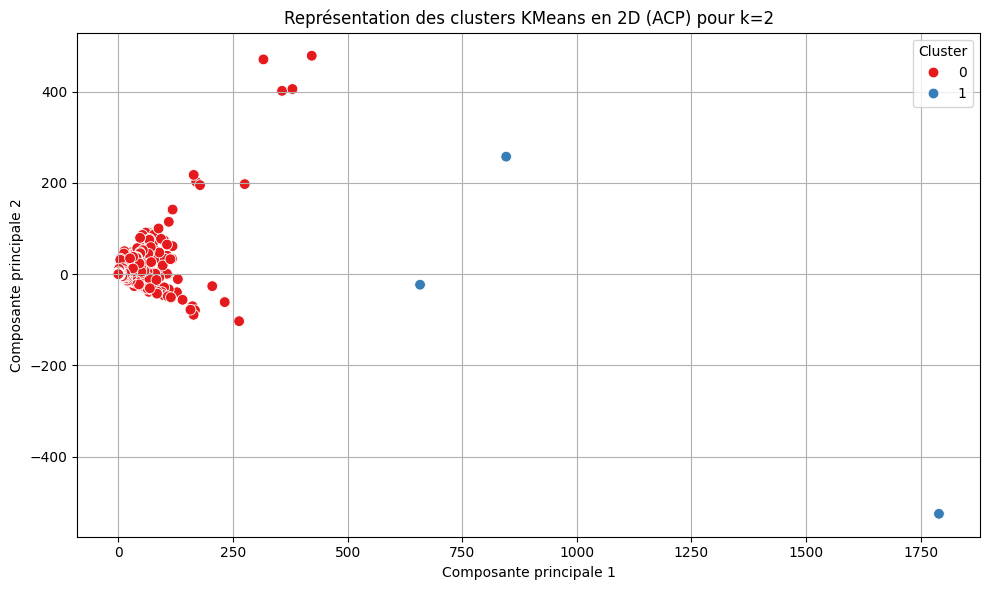

In [25]:
algoKmeans(2)

### Kmeans = 3

🔹 Labels (attribution des clusters) :
[0 0 0 ... 0 0 0]

🔹 Centres des clusters (coordonnées dans l’espace PCA ou des features) :
[[-1.16115109e-03 -1.01069513e-03 -1.14504019e-03 -5.84696432e-04
  -1.51857658e-05 -7.47135917e-04 -1.09211348e-03 -1.78604414e-03
  -1.34513530e-03  1.89660949e-08 -6.92266375e-05]
 [ 1.37100332e+02  1.86318471e+02  1.33290491e+02  9.40540294e+00
   2.80199518e+00  4.55443215e+01  1.54086521e+02  2.85263992e+02
   2.14868631e+02 -3.92983936e-03  1.27624313e+01]
 [ 7.69495109e+02 -4.10130069e-02  7.77894237e+02  9.83791744e+02
  -2.60859183e-02  9.21848053e+02  4.72367356e+02  4.39803871e+02
   3.30973757e+02  4.33576154e-03 -9.99121516e-03]]

🔹 Inertie (somme des distances intra-cluster) : 14487838.58
Variance expliquée par PC1 et PC2 : [0.41317466 0.11275574]
Somme : 0.525930390696418

🔹 Moyennes des variables originales par cluster :
            n_tweets   n_replies     n_quotes   n_retweets  max_followers  \
cluster                                      

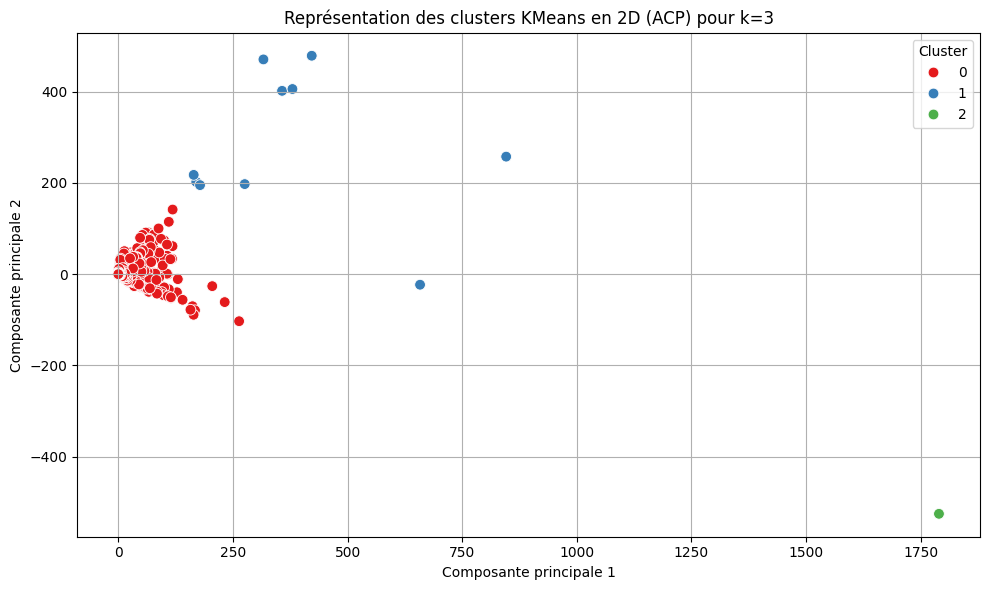

In [26]:
algoKmeans(3)

🔹 Labels (attribution des clusters) :
[0 0 0 ... 0 0 0]

🔹 Centres des clusters (coordonnées dans l’espace PCA ou des features) :
[[-2.14724829e-02 -8.69210183e-03 -6.05967695e-03 -1.58528717e-02
  -4.85586501e-03 -1.73415073e-02 -1.74343700e-02 -1.45257760e-02
  -1.21796414e-02 -1.90131699e-07 -1.26389145e-04]
 [ 7.69495109e+02 -4.10130069e-02  7.77894237e+02  9.83791744e+02
  -2.60859183e-02  9.21848053e+02  4.72367356e+02  4.39803871e+02
   3.30973757e+02  4.33576154e-03 -9.99121516e-03]
 [ 1.13541105e+01  4.77139672e+00  2.73582175e+00  8.44902093e+00
   2.68506100e+00  9.28241821e+00  9.13069296e+00  7.29778697e+00
   6.13929673e+00  1.08999814e-04  3.16049999e-02]
 [ 1.97954980e+02  2.59106079e+01  2.55191695e+02  1.88419250e+01
   1.50286560e+00  2.48715370e+01  2.49840467e+02  4.04810208e+02
   3.33544023e+02 -3.37945674e-03  2.54986085e+01]]

🔹 Inertie (somme des distances intra-cluster) : 12856088.26
Variance expliquée par PC1 et PC2 : [0.41317466 0.11275574]
Somme : 0.525930

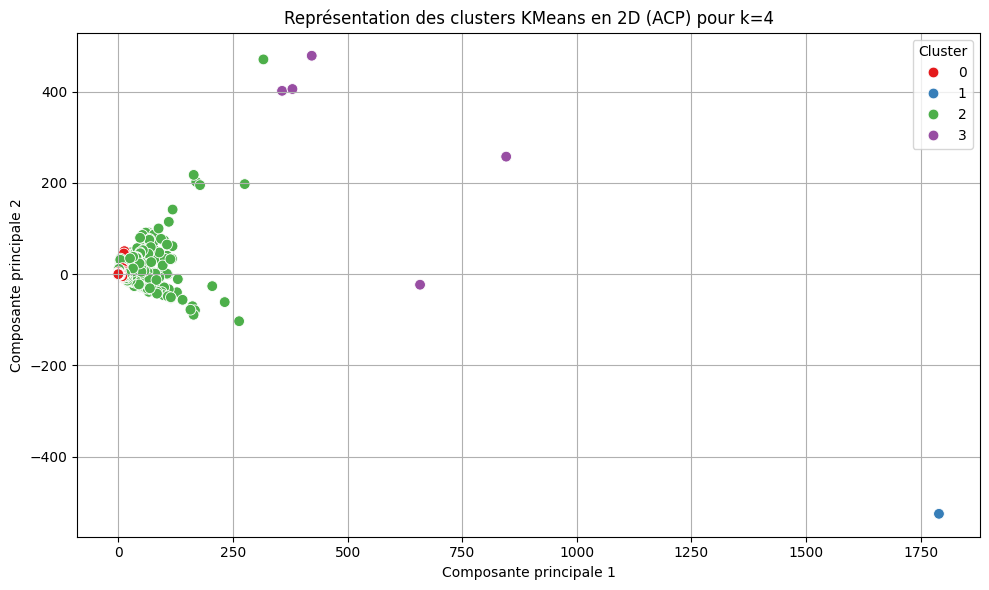

In [27]:
algoKmeans(4)

🔹 Labels (attribution des clusters) :
[0 0 0 ... 0 0 0]

🔹 Centres des clusters (coordonnées dans l’espace PCA ou des features) :
[[-2.09161472e-02 -8.57806429e-03 -5.94473450e-03 -1.54065111e-02
  -1.10465775e-03 -1.68736185e-02 -1.70145988e-02 -1.42729561e-02
  -1.19643231e-02 -3.19129520e-06 -1.68988383e-03]
 [ 1.97954980e+02  2.59106079e+01  2.55191695e+02  1.88419250e+01
   1.50286560e+00  2.48715370e+01  2.49840467e+02  4.04810208e+02
   3.33544023e+02 -3.37945674e-03  2.54986085e+01]
 [ 2.25640796e-03 -4.10130069e-02 -7.81520157e-02  5.61670113e-03
   1.79872709e-01 -3.03124331e-02 -4.19760302e-03  3.28658527e-02
  -5.87964561e-02  7.16889301e-01  4.79806499e+02]
 [ 7.69495109e+02 -4.10130069e-02  7.77894237e+02  9.83791744e+02
  -2.60859183e-02  9.21848053e+02  4.72367356e+02  4.39803871e+02
   3.30973757e+02  4.33576154e-03 -9.99121516e-03]
 [ 1.17695699e+01  5.01666044e+00  2.84740364e+00  8.73907713e+00
   6.48619289e-01  9.61441767e+00  9.48110341e+00  7.62657950e+00
   6.4

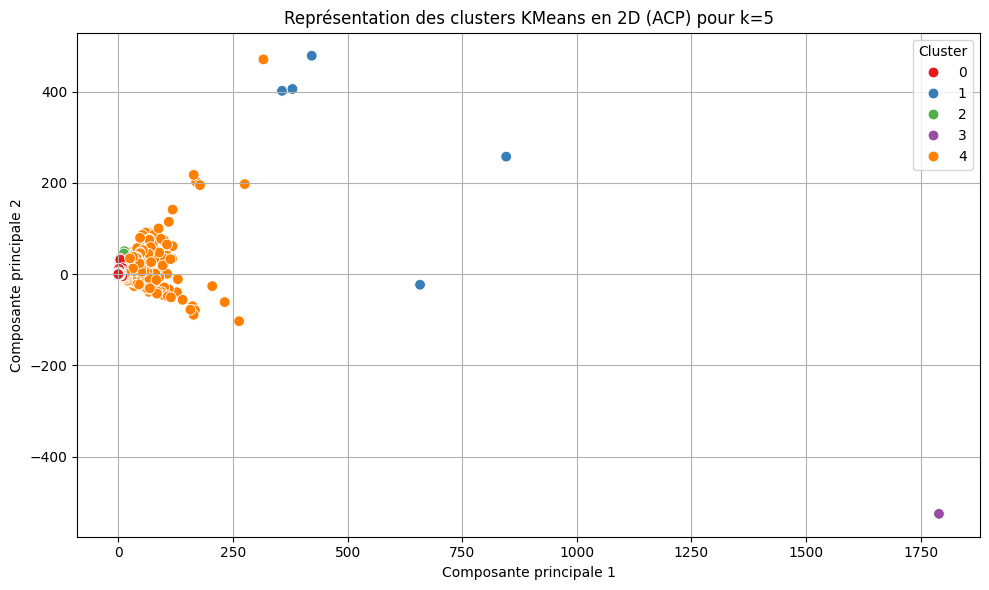

In [28]:
algoKmeans(5)

🔹 Labels (attribution des clusters) :
[0 0 0 ... 0 0 0]

🔹 Centres des clusters (coordonnées dans l’espace PCA ou des features) :
[[-2.09349233e-02 -8.58484719e-03 -5.94768231e-03 -1.54103623e-02
  -5.88221425e-03 -1.68883392e-02 -1.70234392e-02 -1.42928748e-02
  -1.19799937e-02 -2.93642348e-06 -1.68956769e-03]
 [ 7.69495109e+02 -4.10130069e-02  7.77894237e+02  9.83791744e+02
  -2.60859183e-02  9.21848053e+02  4.72367356e+02  4.39803871e+02
   3.30973757e+02  4.33576154e-03 -9.99121516e-03]
 [ 1.97954980e+02  2.59106079e+01  2.55191695e+02  1.88419250e+01
   1.50286560e+00  2.48715370e+01  2.49840467e+02  4.04810208e+02
   3.33544023e+02 -3.37945674e-03  2.54986085e+01]
 [ 2.25640796e-03 -4.10130069e-02 -7.81520157e-02  5.61670113e-03
   1.79872709e-01 -3.03124331e-02 -4.19760302e-03  3.28658527e-02
  -5.87964561e-02  7.16889301e-01  4.79806499e+02]
 [ 1.00207206e+00  6.02598147e-02  5.17592599e-03  3.11748805e-01
   1.15818149e+02  5.88535197e-01  8.06197838e-01  1.19767197e+00
   1.5

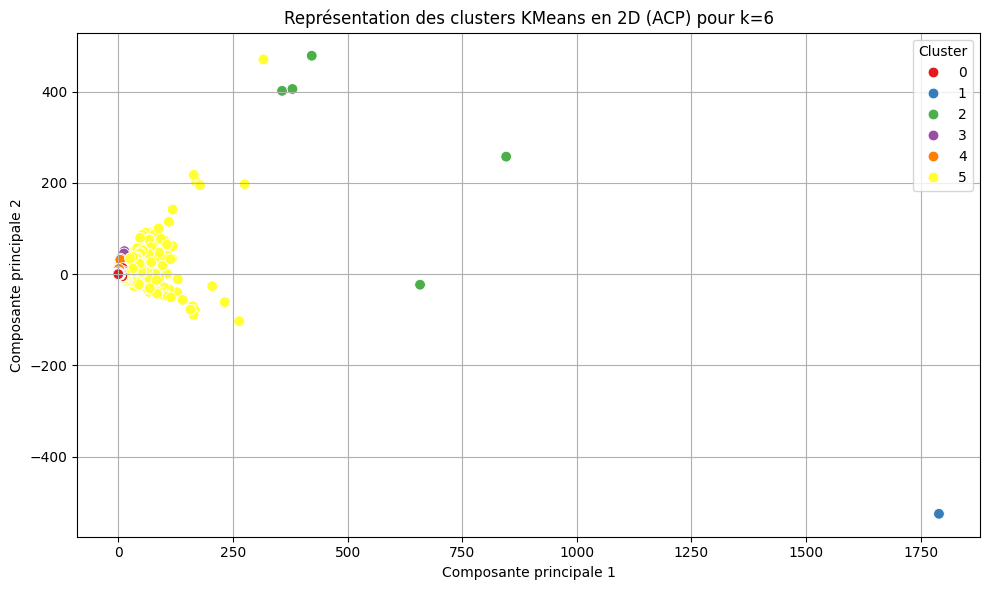

In [29]:
algoKmeans(6)